#### Q2-Deep Neural Network
Author:Isil Erbasol Serbes

1.	Load the data sets ['xTrain.csv','xTest.csv','yTrain.csv','yTest.csv']
Then onehot encode the labels (y), recommend: 

from sklearn.preprocessing import OneHotEncoder

Also standardise the data (x)

In [12]:
#Step1 Preprocessing
# some imports and data preprocessing:

#Import the libraries
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets

#Load the data from csv files as data frame with pandas
x_train = pd.read_csv('xTrain.csv') # x_train subset
x_test  = pd.read_csv('xTest.csv') # x_test subset
y_train = pd.read_csv('yTrain.csv') # y_train subset
y_test  = pd.read_csv('yTest.csv') # y_test subset

#Check the datasets if they imported correctly:
#To visualize the dataframe clearer, I imported the display from IPython
from IPython.display import display

# Display x_train DataFrame
print("x_train:")
display(x_train.head(5))

# Display y_train DataFrame
print("y_train:")
display(y_train.head(5))

# Display x_test DataFrame
print("x_test:")
display(x_test.head(5))

# Display y_test DataFrame
print("y_test:")
display(y_test.head(5))

#Check the shape (dimension) of the arrays to check the number of samples and features
print("Dimensions of the datasets:")
print(f"x_train:{x_train.shape}, x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}, y_test:{y_test.shape}")
print("-----------------------------------") #since we have many prints, I seperated them to understand the outputs clearer.


#Encode categorical features as a one-hot numeric array.

##import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

## Create an instance of OneHotEncoder 
encoder = OneHotEncoder()

## Fit the encoder on the target variables (y_train and y_test) to learn the categories.
encoder.fit(y_train) #for y_train
encoder.fit(y_test) #for y_test 

## Transform the target variables (y) into one-hot encoded representation and convert them to NumPy arrays using toarray().

#### for y_train
y_onehot_train = encoder.transform(y_train).toarray() 
#### check if the transformation correct

print("y_onehot_train (the first 2 lines):")
print(y_onehot_train[:2]) 

#### for y_test
y_onehot_test = encoder.transform(y_test).toarray() 

#check if the transformation correct

print("y_onehot_test (the first 2 lines):")
print(y_onehot_test[:2]) 

# additionally we standardise x to have zero mean and unit variance:
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)


x_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.289498,-0.528092,0.932924,-0.161299,1.343867,-2.221075,-1.689606,1.867568,0.259969,3.399779,-3.554724,0.204033,-0.421724,-0.161299,-0.421724,-0.465797,0.763172,-6.211199,-0.113473,-0.421724
1,0.665184,-3.705060,1.977522,-1.721783,1.117767,-1.165916,-0.537273,0.294141,-0.201334,-3.687141,2.213047,-2.054423,-1.548261,-1.721783,-1.548261,-0.323635,-0.100372,-2.406475,0.976131,-1.548261
2,2.485989,-3.026046,1.709116,1.593155,-1.464133,-2.249700,0.289291,1.732074,3.205592,-0.651186,1.467468,-1.865363,-1.619421,1.593155,-1.619421,-1.602534,-1.781435,-5.865555,1.802703,-1.619421
3,2.217893,1.070414,1.679266,-3.447382,3.540207,0.227516,-0.789129,-0.597559,4.667461,1.837236,1.102737,-4.891232,-2.434149,-3.447382,-2.434149,-3.414746,0.313265,-3.747540,-1.910150,-2.434149
4,-3.102022,-1.322341,-0.510097,-2.614912,2.943971,-0.690593,0.376778,-0.091216,-0.535496,5.216014,-3.552354,-2.914532,-0.764714,-2.614912,-0.764714,3.209198,-1.304674,-3.743422,-0.006678,-0.764714


y_train:


,Class
0,3
1,4
2,4
3,1
4,3


x_test:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.294205,0.283854,1.562254,-0.060866,0.084507,1.043702,-1.791986,-3.292739,-1.320617,-2.405710,4.498679,-2.200481,-0.109425,-0.060866,-0.109425,0.307162,2.872966,3.963068,0.347432,-0.109425
1,-1.005076,0.051316,1.002669,0.110126,-1.023437,-0.517248,1.463644,1.484678,6.258958,0.748052,0.699829,-5.142164,0.797280,0.110126,0.797280,-0.952965,0.812967,-2.033559,1.115513,0.797280
2,-1.798069,-3.651082,-1.913768,2.218171,0.481348,-3.136528,-1.078366,1.321351,0.240908,2.517119,-3.941437,2.715820,2.557055,2.218171,2.557055,-2.751435,-0.986851,-2.302307,1.116387,2.557055
3,-3.012211,-2.148432,-3.005672,0.079503,0.958659,-1.372435,-0.990556,-1.171948,-5.715692,-0.393690,-1.835613,8.716149,2.802986,0.079503,2.802986,-2.990886,-3.086703,11.142713,3.191488,2.802986
4,-1.917404,-1.832732,1.963684,-2.059830,1.607618,-4.339355,-0.684131,-3.555112,1.672000,-2.264035,1.177939,3.682906,-0.131351,-2.059830,-0.131351,-0.854963,-1.364191,-1.622179,-2.089502,-0.131351


y_test:


,Class
0,4
1,2
2,3
3,3
4,1


Dimensions of the datasets:
x_train:(700, 20), x_test:(300, 20)
y_train:(700, 1), y_test:(300, 1)
-----------------------------------
y_onehot_train (the first 2 lines):
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
y_onehot_test (the first 2 lines):
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'''Everything looks good.'''

    + The dataset was pre-splited. We have 300 samples for testing and 700 samples for trainining. 

    + We have 20 inputs (features) in x and we have 5 classes in target variable y. 

    + By using onehot encode, we transformed target variables (y) into one-hot encoded representations (as we learned in the module, we used "np.eye" before) and it was correctly transformed the values.
    + We also standardised x. 

''' We can now continue with building the ANN model.'''


2.	Finish the design for this running neural net

In [13]:
#Step2: Building the model

##Import the Tensor flow,Keras and related modules
import tensorflow as tf
from tensorflow.keras import models, layers, losses, optimizers, metrics, regularizers

## Model initialization:create a sequential model for building a neural network
model = models.Sequential()

## Adding L2 regulatization to prevent overfitting
regularizer = regularizers.L2(0.01) # Adding an additional weight term as penality to the loss function
                                    # encourages the model to have smaller weights,
                                    # which leads to a simpler model and prevents overfitting.

## Create hidden layers in a loop (here we will use 10 units for first layer, 30 units for second and 10 units for third layer):
## These are random choices, we can perfom grid search to test optimal layer combinations in real world case.
neurons_per_layer = [10, 30, 10]
for num_neurons in neurons_per_layer:
    model.add(layers.Dense(num_neurons, 
                            activation=tf.nn.relu, # relu activation (efficiently capture non-linear patterns in data), 
                            kernel_regularizer=regularizer)) #L2 regularization

## Create a outpur layer (because we have 5 classes in the y target vector, we therefore set 5 units in the output layer)
model.add(layers.Dense(5, activation=tf.nn.softmax)) #In the module,we used softmax activation function, which 
                                                     #transforms the output of a neural network's last
                                                     #layer into a probability distribution over multiple classes.
    
## Building a model with twenty input units(because we have twenty features in x) (and a variable batch dimension (None))   
model.build(input_shape=(None, 20,))  

### Visualize the model and control if everything is in order
print(model.summary())

'''In the model summary, we can see that we created 3 hidden layers (10,30,10 units) and the output layer (5 units). 
And this results to set 905 parameters (weight+bias). Now we can set the optimisation for the model.'''

#Step2-2: Set the optimisation 

## set the learning rate:
lr= 0.005 #learning rate is a very important hyperparameter in training neural networks.
          #I here wanted to try 0.005 (it is not very big or very small value for learning rate)
                   
        
## Set up the loss (here we use cross-entropy loss with label smoothing, to helps the model performance:)      
xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)

## We use "adam" optimization algorithm rather than gradient descent
adam_optim = optimizers.Adam(learning_rate = lr) #Adam is to adaptively adjust the learning rate for 
                                                 #each parameter during training.

# compile with this loss, optimizer, and accuracy metric:
model.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________
None


3.	Train your net with the data, output a classified set (fix the code again)

In [14]:
#Step3: Train and test the model
## We also store the each loss during training in log variable.
log = model.fit(x_train, y_onehot_train, 
                        batch_size=32, #Batch size is also a hyperparameter.A common approach is to use batch sizes that are 
                                       # powers of 2 for efficiency reasons. Here, I choose 32 for 700 training samples.
                        validation_data=(x_test, y_onehot_test), 
                        epochs=300, #similarly epochs is also a hyperparameter. Excessive epochs can lead to overfitting.
                                    #Therefore I use 300 epochs.
                        verbose=True) 

Epoch 1/300
22/22 [==============================] - 1s 5ms/step - loss: 1.9555 - categorical_accuracy: 0.2814 - val_loss: 1.8296 - val_categorical_accuracy: 0.3667
Epoch 2/300
22/22 [==============================] - 0s 1ms/step - loss: 1.7574 - categorical_accuracy: 0.3943 - val_loss: 1.6799 - val_categorical_accuracy: 0.4067
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 1.6308 - categorical_accuracy: 0.4271 - val_loss: 1.5978 - val_categorical_accuracy: 0.4367
Epoch 4/300
22/22 [==============================] - 0s 1ms/step - loss: 1.5500 - categorical_accuracy: 0.4629 - val_loss: 1.5425 - val_categorical_accuracy: 0.4767
Epoch 5/300
22/22 [==============================] - 0s 1ms/step - loss: 1.4979 - categorical_accuracy: 0.5257 - val_loss: 1.5231 - val_categorical_accuracy: 0.5000
Epoch 6/300
22/22 [==============================] - 0s 1ms/step - loss: 1.4556 - categorical_accuracy: 0.5429 - val_loss: 1.4952 - val_categorical_accuracy: 0.4933
Epoch 7/30

22/22 [==============================] - 0s 2ms/step - loss: 1.1258 - categorical_accuracy: 0.8200 - val_loss: 1.3208 - val_categorical_accuracy: 0.6867
Epoch 100/300
22/22 [==============================] - 0s 2ms/step - loss: 1.1381 - categorical_accuracy: 0.7914 - val_loss: 1.3399 - val_categorical_accuracy: 0.6500
Epoch 101/300
22/22 [==============================] - 0s 2ms/step - loss: 1.1257 - categorical_accuracy: 0.8157 - val_loss: 1.3432 - val_categorical_accuracy: 0.6467
Epoch 102/300
22/22 [==============================] - 0s 1ms/step - loss: 1.1293 - categorical_accuracy: 0.8029 - val_loss: 1.3451 - val_categorical_accuracy: 0.6700
Epoch 103/300
22/22 [==============================] - 0s 2ms/step - loss: 1.1327 - categorical_accuracy: 0.8029 - val_loss: 1.3214 - val_categorical_accuracy: 0.6700
Epoch 104/300
22/22 [==============================] - 0s 2ms/step - loss: 1.1244 - categorical_accuracy: 0.8129 - val_loss: 1.3154 - val_categorical_accuracy: 0.6733
Epoch 105/30

22/22 [==============================] - 0s 1ms/step - loss: 1.0716 - categorical_accuracy: 0.8443 - val_loss: 1.3055 - val_categorical_accuracy: 0.6833
Epoch 198/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0626 - categorical_accuracy: 0.8486 - val_loss: 1.3253 - val_categorical_accuracy: 0.6733
Epoch 199/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0700 - categorical_accuracy: 0.8543 - val_loss: 1.3028 - val_categorical_accuracy: 0.6933
Epoch 200/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0680 - categorical_accuracy: 0.8500 - val_loss: 1.3059 - val_categorical_accuracy: 0.6633
Epoch 201/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0668 - categorical_accuracy: 0.8529 - val_loss: 1.3015 - val_categorical_accuracy: 0.6733
Epoch 202/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0809 - categorical_accuracy: 0.8300 - val_loss: 1.3373 - val_categorical_accuracy: 0.6400
Epoch 203/30

22/22 [==============================] - 0s 1ms/step - loss: 1.0506 - categorical_accuracy: 0.8514 - val_loss: 1.3015 - val_categorical_accuracy: 0.6733
Epoch 296/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0454 - categorical_accuracy: 0.8529 - val_loss: 1.2991 - val_categorical_accuracy: 0.6767
Epoch 297/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0373 - categorical_accuracy: 0.8629 - val_loss: 1.2826 - val_categorical_accuracy: 0.7033
Epoch 298/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0286 - categorical_accuracy: 0.8700 - val_loss: 1.3012 - val_categorical_accuracy: 0.6867
Epoch 299/300
22/22 [==============================] - 0s 1ms/step - loss: 1.0382 - categorical_accuracy: 0.8614 - val_loss: 1.3320 - val_categorical_accuracy: 0.6567
Epoch 300/300
22/22 [==============================] - 0s 2ms/step - loss: 1.0391 - categorical_accuracy: 0.8629 - val_loss: 1.2921 - val_categorical_accuracy: 0.6867


4.	Achieve a final accuracy of above 80% and loss under 1.1 on the training set

In [15]:
#Step4: Model evaluation
print('loss: ',log.history['loss'][-1])
print('accuracy: ',log.history['categorical_accuracy'][-1])

loss:  1.0390585660934448
accuracy:  0.8628571629524231


5.	Visualize net accuracy across epochs

Text(0.2, 0.7, 'Final test accuracy: 0.687')

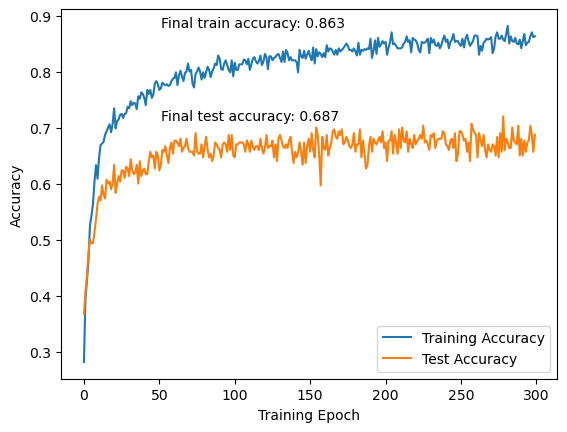

In [16]:
#Step4: Model evaluation cont.
# Plot history of the accuracy over time found in the 'log' object:
plt.plot(log.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(log.history['val_categorical_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy')

# Display final accuracy in the corner of the plot:
final_train_accuracy = log.history['categorical_accuracy'][-1]
final_test_accuracy = log.history['val_categorical_accuracy'][-1]
plt.annotate(f'Final train accuracy: {final_train_accuracy:.3}', (0.2, 0.95), xycoords='axes fraction')
plt.annotate(f'Final test accuracy: {final_test_accuracy:.3}', (0.2, 0.7), xycoords='axes fraction')



    """ In the plot, we observe that the network accuracy initially increases rapidly, but after approximately 100 epochs of training, the rate of change in accuracy becomes very small. As the training progresses beyond 200 epochs, the accuracy reaches a nearly stable level, with minimal improvements observed. 

    The training data and the test data accuracy line do not overlay or very close to each other:training accuracy line is far higher than test accuracy line. This can be reason of several factors:1) overfitting (because training accuracy is higher than test accuracy), 2) training and test data are different than each other such that the model cannot provide a good prediction to unseen data (this is called data mismatch). 3)The model we used can be very complex which can performs better with training data but poorly perform with test data. In this case, we could think about drop out.4) Lastly, we can think of increasing number of training data, we have 700 samples and the our output units are 5 and maybe for our multiclass classification problem, 700 sample size for training data may not be enough.

    Still the hyperparameters that I used lr=0.005,batch_size=32 and epochs=300 enables to reach the final accuracy of above 80% and loss under 1.1 on the training set (final accuracy for training=0.86 and loss=1.04. """

6.	Vary the learning rate (perhaps using a loop), find the best rate for both training and test sets, visualize them across epochs each time

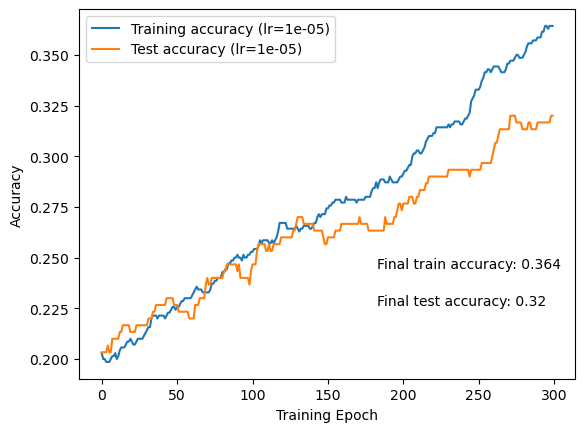

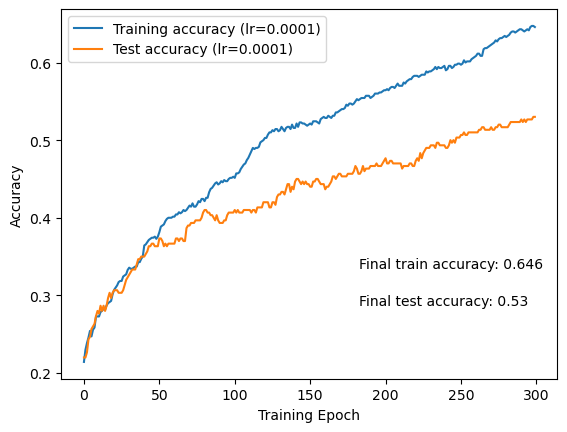

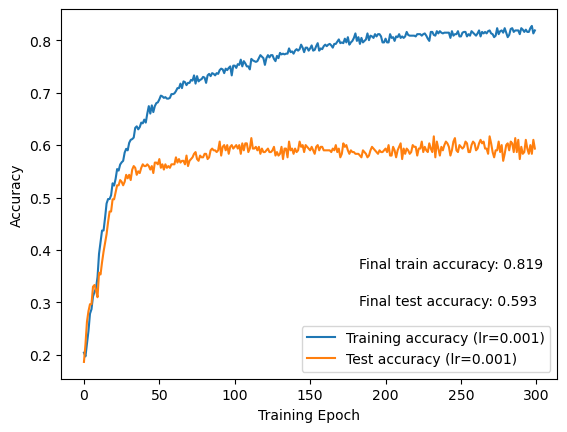

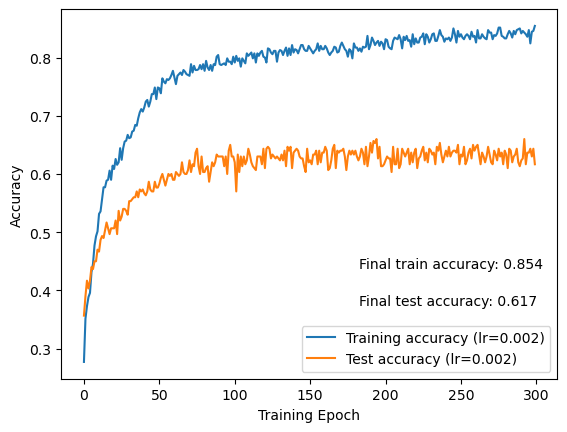

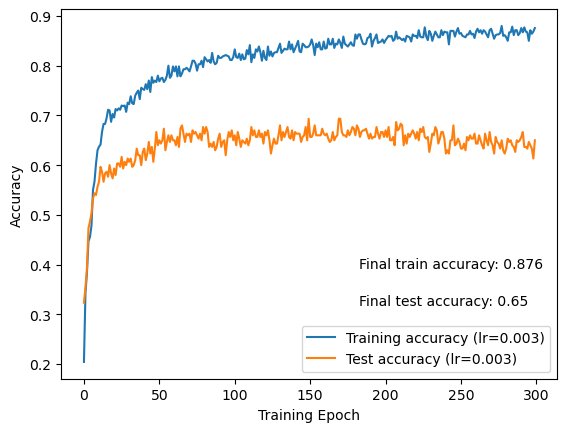

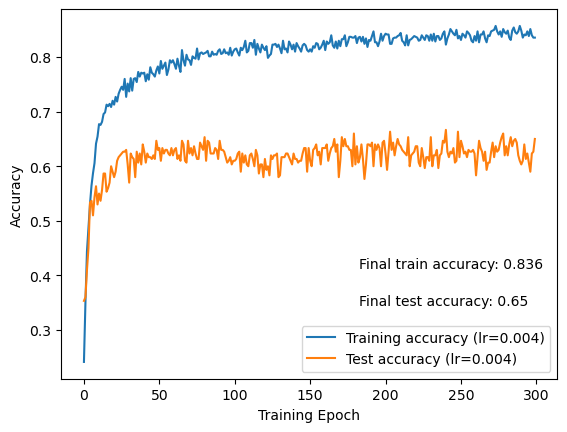

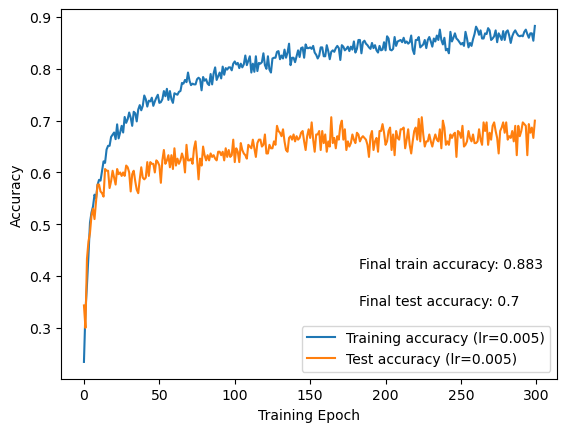

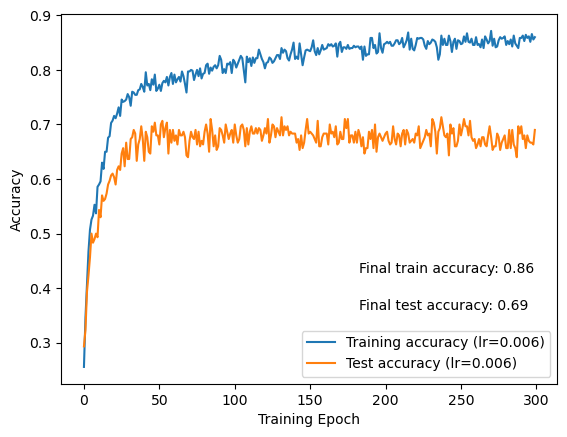

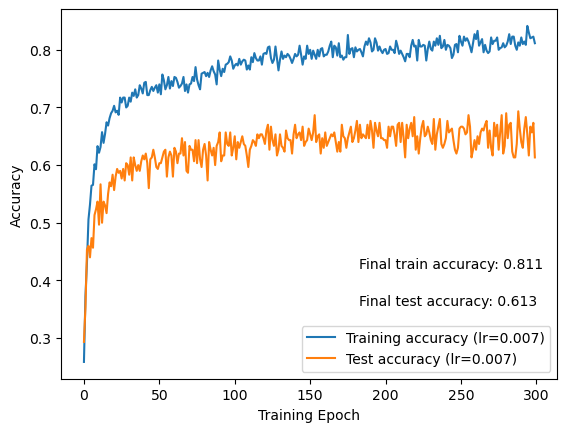

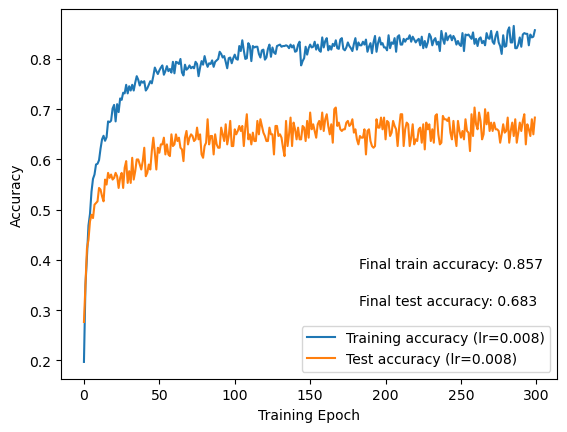

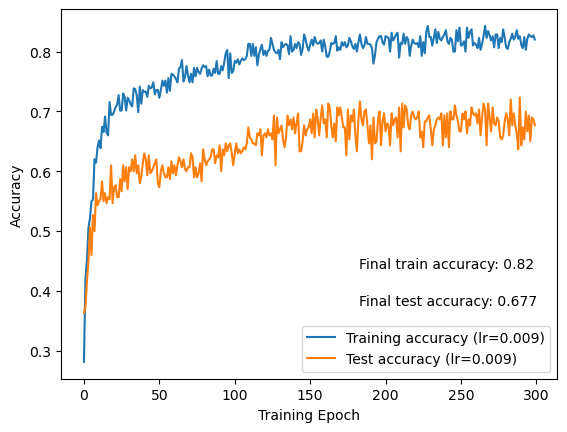

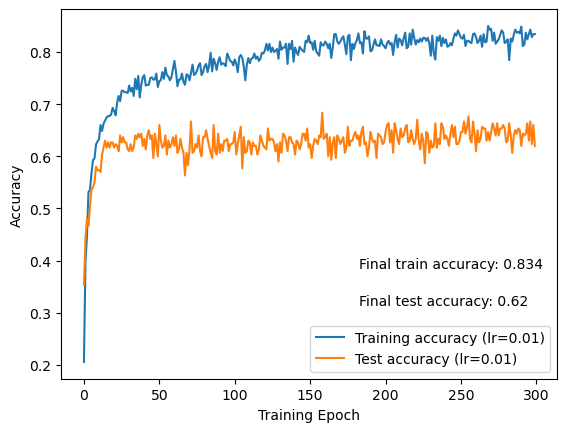

In [17]:
#Step5: Testing different learning rates in order to understand its role on model performance :
#might want to loop here and save the log object

# list of different learning rates (because by default in Keras, lr used as 0.001.
#and in order to find the best learning rate, I will test different range of learning rates from 0.00001 (very small) to 0.05 
#(relatively big)
learning_rates=[0.00001,0.0001,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]


#create empty list to save the accuracy for each learning rate
train_accuracies = []  # List to store training losses 
test_accuracies = []  # List to store test losses 
train_loses = []  # List to store training losses 
test_loses = []  # List to store test losses 


for lr in learning_rates:

    ## Model initialization:create a sequential model for building a neural network
    model = models.Sequential()

    ## Adding L2 regulatization to prevent overfitting
    regularizer = regularizers.L2(0.01) # Adding an additional weight term as penality to the loss function
                                    # encourages the model to have smaller weights,
                                    # which leads to a simpler model and prevents overfitting.

    ## Create hidden layers in a loop (here we will use 10 units for first layer, 30 units for second and 10 units for third layer):
    ## These are random choices, we can perfom grid search to test optimal layer combinations in real world case.
    neurons_per_layer = [10, 30, 10]
    for num_neurons in neurons_per_layer:
        model.add(layers.Dense(num_neurons, 
                            activation=tf.nn.relu, # relu activation (efficiently capture non-linear patterns in data), 
                            kernel_regularizer=regularizer)) #L2 regularization

    ## Create a outpur layer (because we have 5 classes in the y target vector, we therefore set 5 units in the output layer)
    model.add(layers.Dense(5, activation=tf.nn.softmax)) #In the module,we used softmax activation function, which 
                                                     #transforms the output of a neural network's last
                                                     #layer into a probability distribution over multiple classes.
    
    ## Building a model with twenty input units(because we have twenty features in x) (and a variable batch dimension (None))   
    model.build(input_shape=(None, 20,))  
    ## Set up the loss (here we use cross-entropy loss with label smoothing, to helps the model performance:)      
    xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)

    ## We use "adam" optimization algorithm 
    adam_optim = optimizers.Adam(learning_rate = lr) 

    # compile with this loss, optimizer, and accuracy metric:
    model.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])

    log = model.fit(x_train, y_onehot_train,
                    batch_size=32,
                    validation_data=(x_test, y_onehot_test),
                    epochs=300,
                    verbose=0) #we skip the process visualization
    
   
    #extract the accuracy for train and test for each learning rate
    train_accuracy = log.history['categorical_accuracy'][-1]  # Final training loss
    test_accuracy = log.history['val_categorical_accuracy'][-1]  # Final test loss
    
    #extract the loss for train and test for each learning rate
    train_loss = log.history['loss'][-1]  # Final training loss
    test_loss = log.history['val_loss'][-1]  # Final test loss
    
    #and append the lists 
       
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_loses.append(train_loss)
    test_loses.append(test_loss)
        
    # Plot the accuracy for each learning rate
    plt.plot(log.history['categorical_accuracy'], label=f'Training accuracy (lr={lr})')
    plt.plot(log.history['val_categorical_accuracy'], label=f'Test accuracy (lr={lr})')
    
    # Display final accuracy in the corner of the plot:
    final_train_accuracy = log.history['categorical_accuracy'][-1]
    final_test_accuracy = log.history['val_categorical_accuracy'][-1]
    plt.annotate(f'Final train accuracy: {final_train_accuracy:.3}', (0.6, 0.30), xycoords='axes fraction')
    plt.annotate(f'Final test accuracy: {final_test_accuracy:.3}', (0.6, 0.20), xycoords='axes fraction')
    
    plt.legend()
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.show()
    
    
   

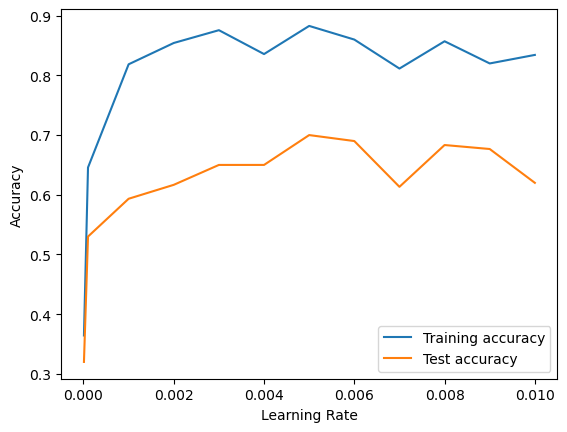

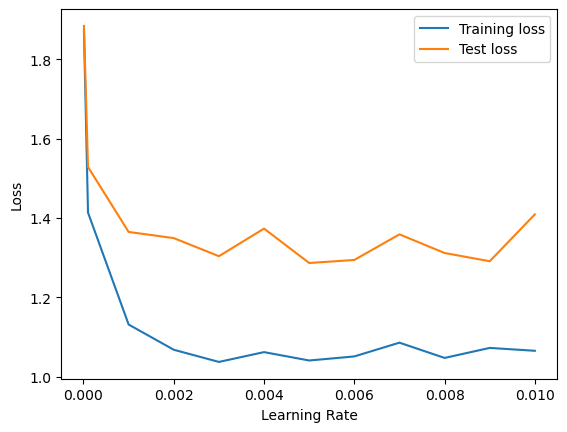

In [18]:
#Step5: Testing different learning rates in order to understand its role on model performance cont.
#visualize log here as a group or individually

# Plot the final accuracies for each learning rate
plt.plot(learning_rates, train_accuracies, label='Training accuracy')
plt.plot(learning_rates, test_accuracies, label='Test accuracy')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


# Plot the final loss for each learning rate
plt.plot(learning_rates, train_loses, label='Training loss')
plt.plot(learning_rates, test_loses, label='Test loss')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()


In [23]:
#I would like to briefly check the class distribution in the test and training sets in order to understand if there is a imbalance class
#distribution problem which could lead to bias model performance

class_counts_train = y_train.value_counts()
class_counts_test = y_test.value_counts()

print(class_counts_train.sort_index())
print(class_counts_test.sort_index())

Class
0        140
1        143
2        141
3        137
4        139
dtype: int64
Class
0        60
1        61
2        60
3        59
4        60
dtype: int64


    ''' In our data sets (train and test), the class distributions are in balance.'''

7.	Briefly, what do you notice? Is there a best learning rate?

    '''When we use a very small learning rate (0.00001), both the training and test data yielded the worst results. One explanation for this is that the network is unable to effectively learn the patterns present in the data with such a small learning rate. This sluggish parameter update slows down the model's ability to converge to an optimal solution within the given number of epochs (we can also see in the plot that the model wasn't converged), resulting in low accuracy for both the training and test sets. Similar results were observed for a learning rate of 0.0001, where the training set accuracy was around 60%, leading to a test set accuracy of approximately 56%.

    By slightly increasing the learning rate, we observed a positive impact on the accuracy of both the training and test sets. By increasing the learning rate, we observe that the model was converged. Within the learning rate range of 0.001 to 0.009, we observed slight fluctuations in accuracy for both sets. The highest training accuracy was achieved at learning rates of 0.004 and 0.005, while the highest test accuracy of 66% was observed at learning rates of 0.003, 0.006, and 0.007. The lowest loss values for both the training and test sets were observed at a learning rate of 0.004, although the test accuracy was slightly lower at 65%. These observations suggest that the optimal learning rate for this particular model and dataset may lie between 0.003 and 0.004. Futhermore, it is important to note that we observed some fluctuations in the values due to the model's initialization with random weights.

    When the learning rate was increased to 0.1, the accuracy rate decreased in the test data, and lower loss values could not be achieved. This is likely because the larger steps taken towards the optimal solution initially reduce the loss significantly, but hinder the model's ability to reach the global minima, leading to suboptimal performance.

    It is worth mentioning two aspects here. Firstly, we did not observe an optimal fit where the accuracy curves of both the training and test sets overlay, even with different learning rates. We predominantly observed higher accuracy in the training set and lower accuracy in the test set, indicating a potential issue with overfitting. Secondly, oscillations were observed in the accuracy curves. These oscillations occur as the model tries to find optimal solutions, frequently updating the parameter values.

    In summary, based on the observations, it appears that a learning rate of 0.004 might be the best choice for this particular model and dataset. Although the Adam optimization algorithm adjusts the learning rate internally, we could see that very low and high learning rates affect the model's performance. Furthermore, in our model, changing the learning rate only increased the model's performance to a certain extent. Several factors could contribute to this limitation. Firstly, the learning rate is not the only hyperparameter that affects the model's performance. Secondly, the training and test samples may not align with a specific pattern (data mismatch), resulting in lower accuracy in the test sample. Lastly, given that our modeling problem involves five classes in the target vector, 700 training samples and 20 inputs may not be the optimal model building. 20 inputs may indeed cause a overfitness issue. We can think about feature selection and if possible to increase the sample numbers and train the model with more sample. This could also help the model to capture the sufficient data structure and identify patterns for all five classes.  '''